### Exploratory Data Analysis:
- variable target : CO2, wich is the emission of CO2 of the car in Kilogram of carbon dioxide equivalent
- Number of rows and columns: df.shape or df.shape[0] + df.shape[1]
- variables types: df.dtypes
- number of different variables: df.dtypes.valuecounts().plot.pie()
- rows where there is no values: df.isna()
- None values
### clean the datas:
- Erase empty column: df=df[df.columns[df.isna().sum()/df.shape[0] < 0.9]] 
  * we want to erase the columns that have less 90% of missing values
- if we want to erase another column df= df.drop('name of the column', axis=1)
- to do the plot of the main variable we can use:
 * sns.distplot(df['C02'])
 * plt.hist(x, bins, density = True)/plt.show()
### Analysis of continous variables:
- we want to analyse all the data that are continuous :
  * for col in df.select_dtypes('float'):
  * plt.figure()
  * sns.distplot(df[col])
### Analysis of discrete variables:
  * sns.distplot(df[''])
### Analysis of categorical variables:
  * for col in df.select_dtypes('object'):
  * plt.figure()
  * sns.distplot(df[col])
  * print(col, df[col].unique()) (this is to know wich values is associated to the row)
  * for col in df.select_dtypes('object'):
  * plt.figure()
  * df[col].value_counts().plot.pie() (this to know the answer for every vehicle)
  







# README FILE:
# Dataset Analysis

Today, pollution from the transport sector accounts for 60.6% of total pollution in europe. That's why so many people are wondering whether they should buy a car to reduce pollution. In this dataset, we'll look at the different parameters that increase vehicle pollution, and how to choose the least polluting car possible.
## The Data
- **What are the data?**  
  This dataset contains information about Cars, like their CO2 emissions, but also their horsepower, if they are hybrid or not, etc...

- **Where do they come from?**  
  https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/

- **Data provenance:**  
  The provenance of the data is https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/ wich is the web site of the French government. It provides lots information about France.

- **Census or sample:**  
  it's a sample by Cars.

- **Raw or processed:**  
  processed because we removed lot's of column like lib-mob-doss which was representing the name of the model in the administrative file or the date because all the datas are from march 2014.


- **Describe the units, size of the sample/population:**  
  - **Units:** Each row represents one different Cars.  
  - **Population/Sample size:**  5504 Cars.

- **Number of variables:**  
  11 columns (variables).

## Variables Description


1. **`lib_mrc`**  
   This variable represents the brand name of the Car. It is a categorical variable.

2. **`lib_mod	`**  
   It represents the model name of the Car. It is a categorical variable.

3. **`cnit`** 
    The CNIT, or Code National d'Identification du Type (National Type Identification Code), is a code created by the manufacturer and then approved by the French government to identify the vehicle model defined by its technical characteristics (engine, version, etc.).
    It is shown in box D.2 of the vehicle registration certificate. It is a categorical variable.
4. **`cod_cbr`** 
    This variable reprensents the fuel code, that's the fuel name used to power the car. In the data set, here are some examples 'ES' for petrol or 'GO' for diesel, 'EE' for ethanol, 'GP' for LPG etc... It is a categorical variable.
5. **`hybride`** 
    This variable shows if a car is hybride or not. the two output are 'yes' or 'no'. It is a categorical variable.
6. **`Puissadmin`** 
    This variable represents the administrative horsepower (or fiscal horsepower) is a value expressed in fiscal horsepower (HP), used in France to calculate the cost of vehicle registration (carte grise), and in some cases for insurance purposes. It is a discrete variable that goes from 1 to 81hp.
7. **`puiss_max`** 
    It represents the maximum power of the car. It is a discrete variable that goes from 10 to 560 hp
8. **`typ_boite_nb_rapp`** 
    It represents the type of gearbox of the car. It's a categorical variable. There is a letter followed by a number. the letter is the type of Gearbox, like 'M' for Manual, and the number is the number of gear ratios.
9. **`conso_mixte`** 
   This varaible represents the average consumption of the car in L/100 Km. It's a continuous variable that goes from 0.6 to 24.5 L/100 Km.
10. **`C02`**
   This varaible represents the C02 emissions of the Car in g/km. it's a continuous variable that goes from 13 to 572 g/Km.
11. **`masse_ordma_max`**
   This variable shows the weight of the car with full tank, the oil, all the options,... the maximum weight of the car. It's a continuous variable that goes from 825 to 3094 Kg.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import jupyprint as jp



In [2]:
df=pd.read_csv("mars-2014-complete.csv", on_bad_lines='skip', sep=';')
df

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,VOLVO,XC70,XC70,XC70 D4 4cyl (181ch) Stop&Start Geartronic 8,M10VLVVP900U606,BZ73CD,GO,non,10,133,...,1755,1755,715/2007*195/2013EURO6,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55040,VOLVO,XC70,XC70,XC70 D4 5cyl (181ch) AWD Geartronic 6,M10VLVVP900V607,BZ8156,GO,non,11,133,...,1799,1799,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55041,VOLVO,XC70,XC70,XC70 D5 (215ch) AWD Geartronic 6,M10VLVVP872R581,BZ8256,GO,non,13,158,...,1798,1798,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55042,VOLVO,XC70,XC70,XC70 D5 (215ch) Stop&Start AWD BVM6,M10VLVVP8723582,BZ83A4,GO,non,12,158,...,1788,1788,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN


In [3]:
df.shape[0]

55044

In [4]:
df.shape[1]

30

In [5]:
df.dtypes

lib_mrq               object
lib_mod_doss          object
lib_mod               object
dscom                 object
cnit                  object
tvv                   object
cod_cbr               object
hybride               object
puiss_admin_98         int64
puiss_max             object
typ_boite_nb_rapp     object
conso_urb             object
conso_exurb           object
conso_mixte           object
co2                  float64
co_typ_1              object
hc                    object
nox                   object
hcnox                 object
ptcl                  object
masse_ordma_min        int64
masse_ordma_max        int64
champ_v9              object
date_maj              object
Carrosserie           object
gamme                 object
Unnamed: 26          float64
Unnamed: 27          float64
Unnamed: 28          float64
Unnamed: 29          float64
dtype: object

In [6]:
df.describe()

,puiss_admin_98,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,55044.000000,55010.000000,55044.000000,55044.000000,0.0,0.0,0.0,0.0
mean,10.551504,201.707035,2102.104553,2341.021801,NaN,NaN,NaN,NaN
std,5.126021,33.976278,294.731715,424.067895,NaN,NaN,NaN,NaN
min,1.000000,13.000000,825.000000,825.000000,NaN,NaN,NaN,NaN
25%,9.000000,193.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,205.000000,2076.000000,2355.000000,NaN,NaN,NaN,NaN
75%,10.000000,216.000000,2246.000000,2709.000000,NaN,NaN,NaN,NaN
max,81.000000,572.000000,2760.000000,3094.000000,NaN,NaN,NaN,NaN


In [7]:
df['puiss_max']=pd.to_numeric(df['puiss_max'], errors='coerce')
df['conso_mixte']=pd.to_numeric(df['conso_mixte'], errors='coerce')
df.describe()

,puiss_admin_98,puiss_max,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,55044.000000,54851.000000,6496.000000,55010.000000,55044.000000,55044.000000,0.0,0.0,0.0,0.0
mean,10.551504,118.848134,7.823584,201.707035,2102.104553,2341.021801,NaN,NaN,NaN,NaN
std,5.126021,44.860591,1.040802,33.976278,294.731715,424.067895,NaN,NaN,NaN,NaN
min,1.000000,10.000000,3.000000,13.000000,825.000000,825.000000,NaN,NaN,NaN,NaN
25%,9.000000,100.000000,8.000000,193.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,120.000000,8.000000,205.000000,2076.000000,2355.000000,NaN,NaN,NaN,NaN
75%,10.000000,120.000000,8.000000,216.000000,2246.000000,2709.000000,NaN,NaN,NaN,NaN
max,81.000000,585.000000,17.000000,572.000000,2760.000000,3094.000000,NaN,NaN,NaN,NaN


In [8]:
df.isna()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [9]:
df=df.sample(n=2000)
df.isna()
df

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
40130,OPEL,CORSA,CORSA,CORSA 5P 1.2 Twinport BVM5,M10PELVP214T028,S-DKN111A06D5B2DKA5,ES,non,5,63.0,...,1163,1163,"""715/2007*459/2012EURO5",NaN,BERLINE,INFERIEURE,NaN,NaN,NaN,NaN
28461,MERCEDES,VIANO,VIANO,VIANO 3.0 CDI,M10MCDVP6069574,639/2LBB61305N3A1G2U37,GO,non,15,165.0,...,2186,2355,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-SUPER,NaN,NaN,NaN,NaN
37485,MERCEDES,VITO,VITO,COMBI 116 CDI,M10MCDVPG12R285,639/2KAA31305N3M3C1U28,GO,non,10,120.0,...,2186,2355,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
28916,MERCEDES,VIANO,VIANO,VIANO 3.5 E,M10MCDVP025U874,639/2LAC91305N1A4H7S27,ES,non,18,190.0,...,2025,2075,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-SUPER,NaN,NaN,NaN,NaN
42150,VOLKSWAGEN,CRAFTER,CRAFTER,CRAFTER COMBI 35 L1H1 TDI (109ch),M10VWGVPC495990,2EC2KN4B1349NNEC24WA9,GO,non,8,80.0,...,1976,2783,"""715/2007*195/2013EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41812,VOLKSWAGEN,CRAFTER,CRAFTER,CRAFTER COMBI 30 L2H1 TDI (109ch) BlueMotion,M10VWGVPE294964,2EC1KN4B1319NMED15UA7,GO,non,8,80.0,...,2005,2739,"""715/2007*195/2013EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
35136,MERCEDES,VITO,VITO,COMBI 116 CDI,M10MCDVP6014538,639/2KAA31280N3A2D2S29,GO,non,10,120.0,...,1976,2075,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN
22830,MERCEDES,VIANO,VIANO,VIANO 2.2 CDI,M10MCDVP603M227,639/2LAA31305N1M3D2S28,GO,non,10,120.0,...,2025,2075,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-SUPER,NaN,NaN,NaN,NaN
35061,MERCEDES,VITO,VITO,COMBI 116 CDI,M10MCDVP376W342,639/2KAA31320E3M3E1S39,GO,non,10,120.0,...,1976,2075,"""715/2007*692/2008EURO5",NaN,MINIBUS,MOY-INFER,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,puiss_admin_98,puiss_max,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,2000.000000,1995.000000,214.000000,1999.000000,2000.000000,2000.000000,0.0,0.0,0.0,0.0
mean,10.776500,121.226566,7.728972,200.430715,2092.737500,2313.992000,NaN,NaN,NaN,NaN
std,5.613047,48.905132,1.171413,35.180488,302.118625,431.436956,NaN,NaN,NaN,NaN
min,1.000000,10.000000,4.000000,85.000000,845.000000,845.000000,NaN,NaN,NaN,NaN
25%,9.000000,100.000000,8.000000,192.000000,1982.000000,2075.000000,NaN,NaN,NaN,NaN
50%,10.000000,120.000000,8.000000,203.000000,2076.000000,2350.000000,NaN,NaN,NaN,NaN
75%,11.000000,120.000000,8.000000,216.000000,2246.000000,2709.000000,NaN,NaN,NaN,NaN
max,74.000000,545.000000,14.000000,398.000000,2586.000000,3094.000000,NaN,NaN,NaN,NaN


In [11]:
df.to_csv('sampledataset.csv', index=False)

In [12]:
n=len(df)
n

2000

In [13]:
df = df.filter(items=["lib_mrq", "lib_mod", "cnit", "cod_cbr", "hybride", "puiss_admin_98", "puiss_max", "typ_boite_nb_rapp" ,"conso_mixte","co2","masse_ordma_max"])
df

,lib_mrq,lib_mod,cnit,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_mixte,co2,masse_ordma_max
40130,OPEL,CORSA,M10PELVP214T028,ES,non,5,63.0,M 5,NaN,129.0,1163
28461,MERCEDES,VIANO,M10MCDVP6069574,GO,non,15,165.0,A 5,NaN,224.0,2355
37485,MERCEDES,VITO,M10MCDVPG12R285,GO,non,10,120.0,M 6,NaN,203.0,2355
28916,MERCEDES,VIANO,M10MCDVP025U874,ES,non,18,190.0,A 5,NaN,279.0,2075
42150,VOLKSWAGEN,CRAFTER,M10VWGVPC495990,GO,non,8,80.0,M 6,NaN,208.0,2783
...,...,...,...,...,...,...,...,...,...,...,...
41812,VOLKSWAGEN,CRAFTER,M10VWGVPE294964,GO,non,8,80.0,M 6,8.0,209.0,2739
35136,MERCEDES,VITO,M10MCDVP6014538,GO,non,10,120.0,A 5,NaN,208.0,2075
22830,MERCEDES,VIANO,M10MCDVP603M227,GO,non,10,120.0,M 6,NaN,187.0,2075
35061,MERCEDES,VITO,M10MCDVP376W342,GO,non,10,120.0,M 6,NaN,198.0,2075


In [14]:
df.describe()

,puiss_admin_98,puiss_max,conso_mixte,co2,masse_ordma_max
count,2000.000000,1995.000000,214.000000,1999.000000,2000.000000
mean,10.776500,121.226566,7.728972,200.430715,2313.992000
std,5.613047,48.905132,1.171413,35.180488,431.436956
min,1.000000,10.000000,4.000000,85.000000,845.000000
25%,9.000000,100.000000,8.000000,192.000000,2075.000000
50%,10.000000,120.000000,8.000000,203.000000,2350.000000
75%,11.000000,120.000000,8.000000,216.000000,2709.000000
max,74.000000,545.000000,14.000000,398.000000,3094.000000


In [15]:
df.shape


(2000, 11)

# II - Description of some variables

## Puiss_admin visualisation

In [16]:
x = np.array(df['puiss_admin_98'][:])
x

array([ 5, 15, 10, ..., 10, 10,  9], shape=(2000,))

In [17]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
Fi = np.cumsum(fi)
ft = pd.DataFrame(data = np.transpose([ni, fi, Fi]), index = levels, columns = ['frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft

,frequencies,relative frequencies,cummulative relative frequencies
1,1.0,0.0005,0.0005
3,1.0,0.0005,0.0010
4,26.0,0.0130,0.0140
5,33.0,0.0165,0.0305
6,31.0,0.0155,0.0460
7,120.0,0.0600,0.1060
8,125.0,0.0625,0.1685
9,572.0,0.2860,0.4545
10,575.0,0.2875,0.7420
11,189.0,0.0945,0.8365


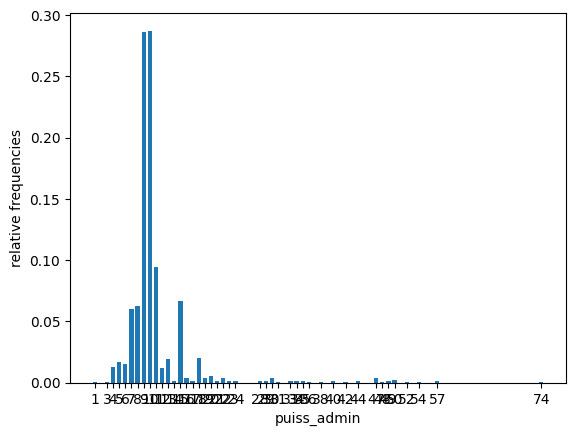

<Figure size 3000x1500 with 0 Axes>

In [18]:
positions = levels

plt.bar(positions, fi, width = 0.7)
plt.xticks(positions, levels) 
plt.ylabel('relative frequencies')
plt.xlabel('puiss_admin')
plt.figure(figsize= (30, 15))
plt.show()

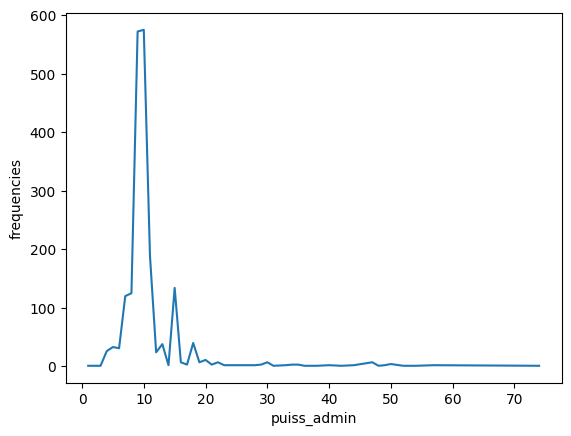

In [19]:
plt.plot(positions, ni)
plt.ylabel('frequencies')
plt.xlabel('puiss_admin')
plt.show()

## Puiss_max visualisation

In [20]:
x = np.array(df['puiss_max'][:])
x

array([ 63., 165., 120., ..., 120., 120., 100.], shape=(2000,))

In [21]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
Fi = np.cumsum(fi)
ft = pd.DataFrame(data = np.transpose([ni, fi, Fi]), index = levels, columns = ['frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft = ft.sort_values(by='frequencies', ascending=False).head(5)
ft

,frequencies,relative frequencies,cummulative relative frequencies
120.0,716.0,0.3580,0.8030
100.0,446.0,0.2230,0.4285
95.0,143.0,0.0715,0.2020
80.0,118.0,0.0590,0.1105
165.0,109.0,0.0545,0.9200


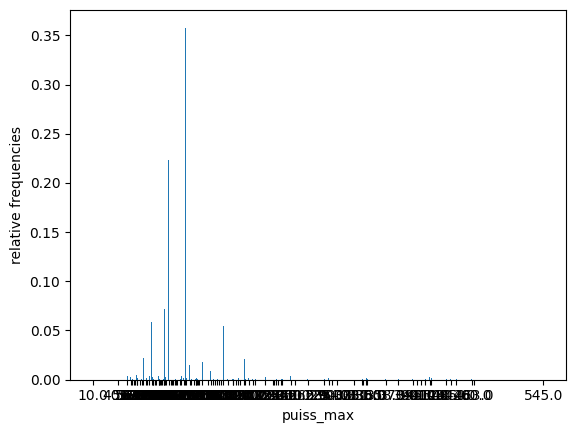

<Figure size 3000x1500 with 0 Axes>

In [22]:
positions = levels

plt.bar(positions, fi, width = 0.7)
plt.xticks(positions, levels) 
plt.ylabel('relative frequencies')
plt.xlabel('puiss_max')
plt.figure(figsize= (30, 15))
plt.tight_layout()
plt.show()

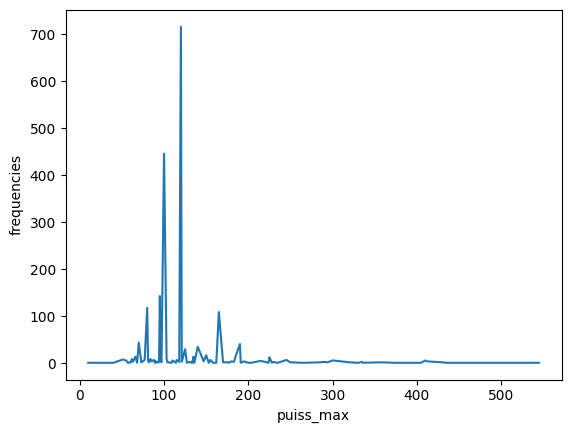

In [23]:
plt.plot(positions, ni)
plt.ylabel('frequencies')
plt.xlabel('puiss_max')
plt.show()

## Cod_cbr visualisation

In [24]:
x = np.array(df['cod_cbr'][:])
x

array(['ES', 'GO', 'GO', ..., 'GO', 'GO', 'GO'],
      shape=(2000,), dtype=object)

In [25]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
ft = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft = ft.sort_values(by='frequencies', ascending=False).head(3)

levels = ft.index
ni = ft['frequencies']
ft

,frequencies,relative frequencies
GO,1783.0,0.8915
ES,189.0,0.0945
EH,21.0,0.0105


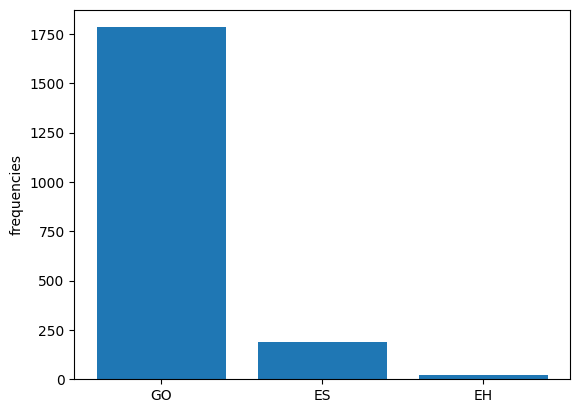

In [26]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

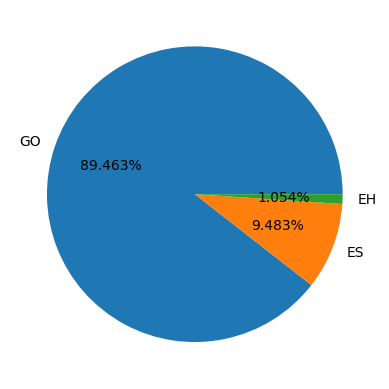

In [27]:
plt.pie(ni, labels = levels, autopct='%1.3f%%')
plt.show()

These are the main cod_cbr on the data set but there exist others such as GP, GN....


## Cnit visualisation 

In [28]:
x = np.array(df['cnit'][:])
x

array(['M10PELVP214T028', 'M10MCDVP6069574', 'M10MCDVPG12R285', ...,
       'M10MCDVP603M227', 'M10MCDVP376W342', 'M10MCDVP372J562'],
      shape=(2000,), dtype=object)

In [29]:
levels, ni = np.unique(x, return_counts = True) 
fi = ni/n
ft = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft = ft.sort_values(by='frequencies', ascending=False)

levels = ft.index
ni = ft['frequencies']
ft

,frequencies,relative frequencies
M1GPSCVP000R581,1.0,0.0005
M10ALFVP0005293,1.0,0.0005
M10ALFVP0009333,1.0,0.0005
M10ALFVP000D373,1.0,0.0005
M10ALFVP000E374,1.0,0.0005
...,...,...
M10AUDVP0071699,1.0,0.0005
M10AUDVP007A999,1.0,0.0005
M10AUDVP007E651,1.0,0.0005
M10AUDVP007J947,1.0,0.0005


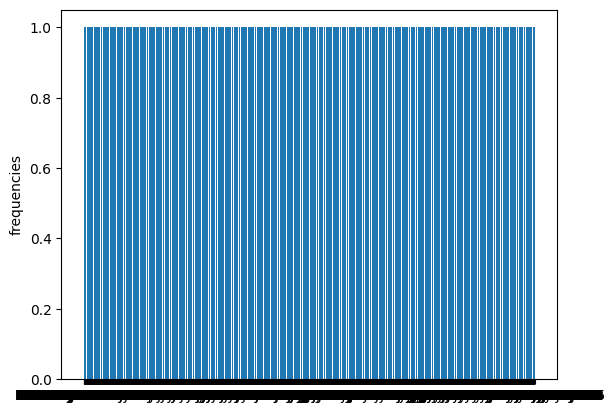

In [30]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

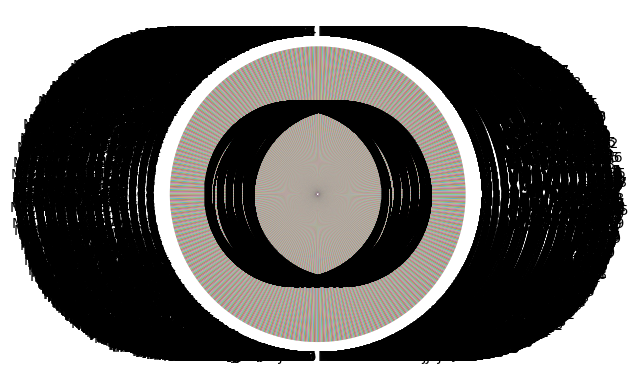

In [31]:
plt.pie(ni, labels = levels, autopct='%1.3f%%')
plt.show()

Those are The `IDs` of the car so it's normal that they all have the same frequency . Its not relevant to do further anlysis for this variable


## lib_mrq visualisation 

In [32]:
x = np.array(df['lib_mrq'][:]) 
x

array(['OPEL', 'MERCEDES', 'MERCEDES', ..., 'MERCEDES', 'MERCEDES',
       'MERCEDES'], shape=(2000,), dtype=object)

In [33]:
levels, ni = np.unique(x, return_counts = True) 
levels, ni, sum(ni)
n = len(df)
fi = ni/n
fi, sum(fi)
ft_cartel = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['Frequencies', 'Relative Frequencies'])
ft_cartel

,Frequencies,Relative Frequencies
ALFA-ROMEO,9.0,0.0045
ASTON MARTIN,3.0,0.0015
AUDI,19.0,0.0095
BENTLEY,1.0,0.0005
BMW,15.0,0.0075
CADILLAC,2.0,0.0010
CHEVROLET,2.0,0.0010
CITROEN,5.0,0.0025
FIAT,24.0,0.0120
FORD,8.0,0.0040


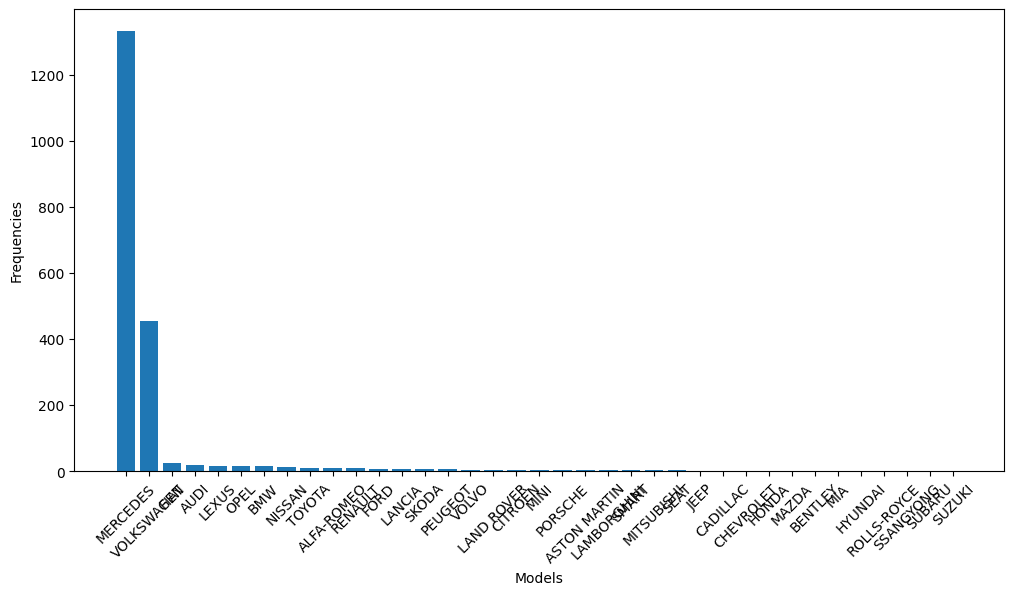

In [34]:
ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.xticks(rotation=45) 
plt.show()

There are a lot of existing models in this dataset i will take only the most relevent ones the `TOP 3 `

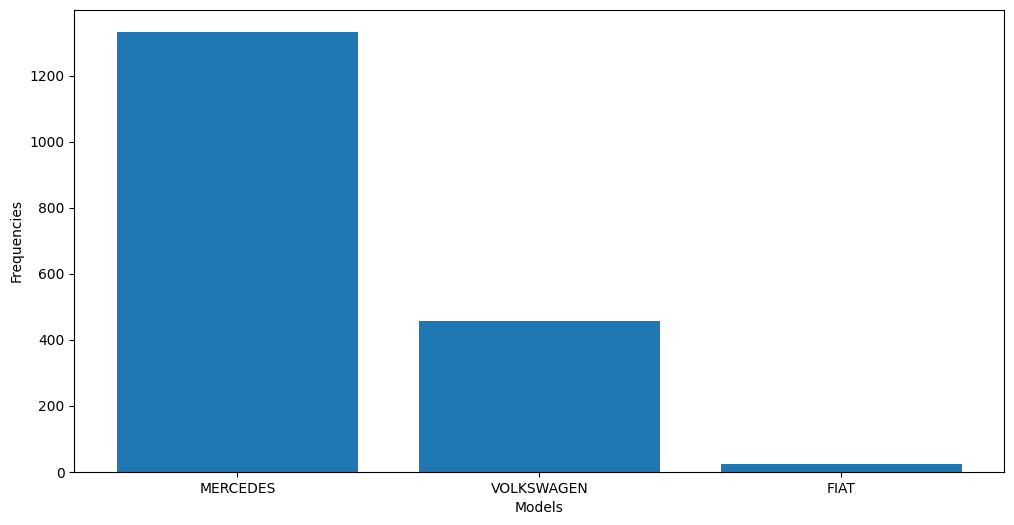

In [35]:

ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False).head(3)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.show()

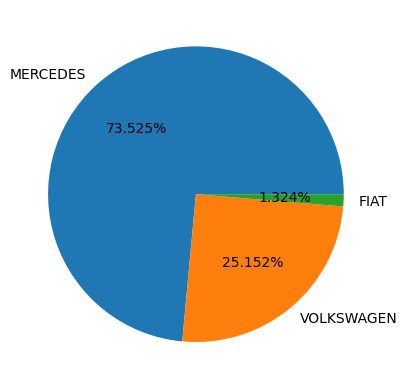

In [36]:
plt.pie(ft_cartel['Frequencies'], labels=ft_cartel.index, autopct='%1.3f%%')
plt.show()

We can see that the `MERCEDES` brand is the most common used followed by `Wolkswagen`

## lib_mod Visualisation

In [37]:
x = np.array(df['lib_mod'][:]) 
x

array(['CORSA', 'VIANO', 'VITO', ..., 'VIANO', 'VITO', 'VITO'],
      shape=(2000,), dtype=object)

In [38]:
levels, ni = np.unique(x, return_counts = True) 
levels, ni, sum(ni)
n = len(df)

fi = ni/n
fi, sum(fi)
ft_cartel = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['Frequencies', 'Relative Frequencies'])
ft_cartel

,Frequencies,Relative Frequencies
116,2.0,0.0010
118,1.0,0.0005
135,1.0,0.0005
159,1.0,0.0005
208,1.0,0.0005
...,...,...
YARIS,3.0,0.0015
YETI,1.0,0.0005
YPSILON,3.0,0.0015
Z4,2.0,0.0010


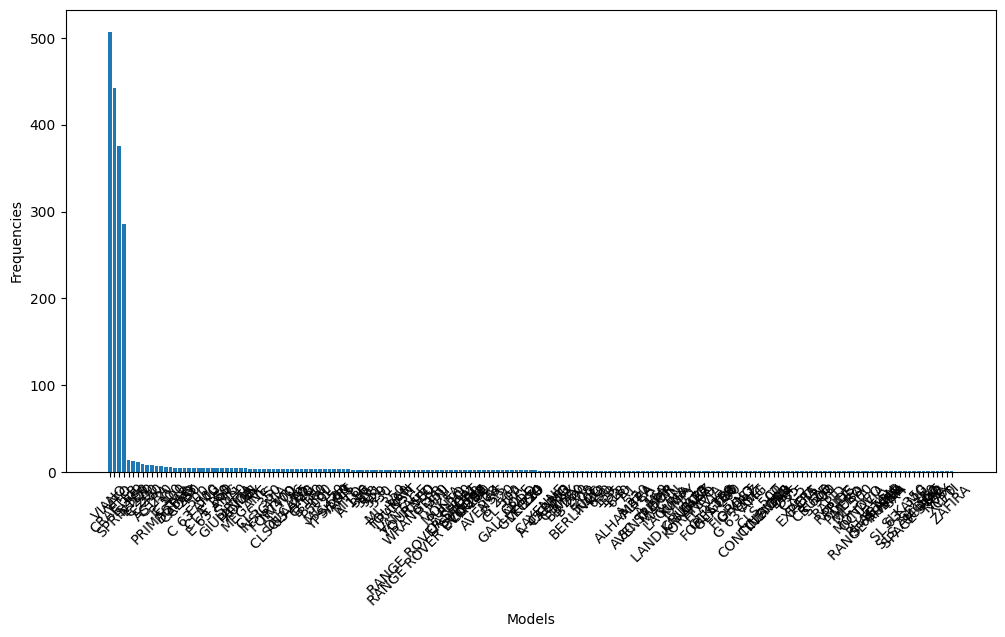

In [39]:
ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.xticks(rotation=45) 
 
plt.show()

There are a lot oh existing models in this dataset i will take only the most relevent ones the `TOP 4 `

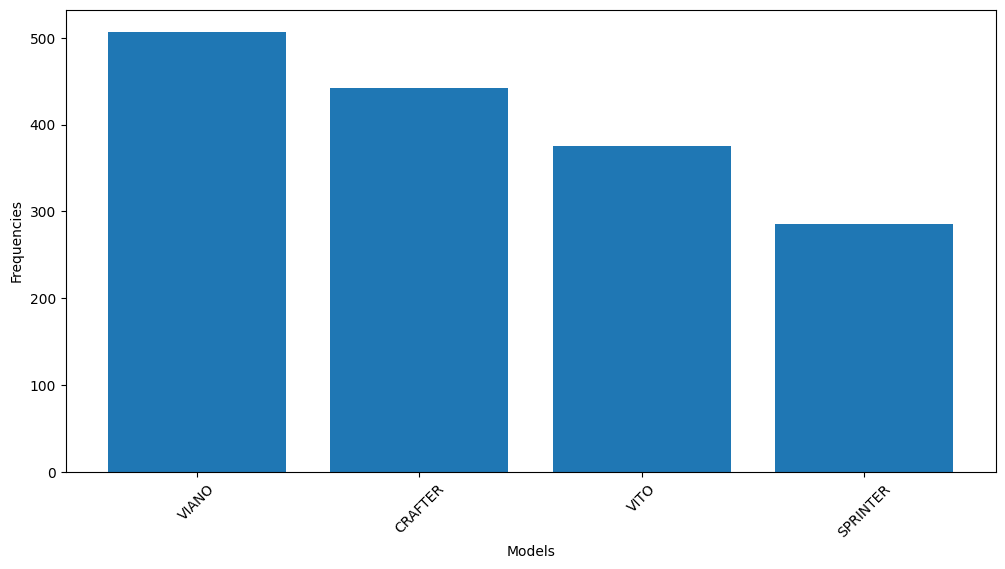

In [40]:
ft_cartel = ft_cartel.sort_values(by='Frequencies', ascending=False).head(4)
plt.figure(figsize=(12, 6)) 
plt.bar(ft_cartel.index, ft_cartel['Frequencies'])
plt.ylabel('Frequencies')
plt.xlabel('Models')
plt.xticks(rotation=45) 
 
plt.show()

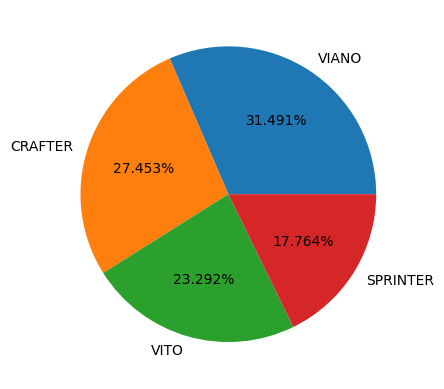

In [41]:
plt.pie(ft_cartel['Frequencies'], labels=ft_cartel.index, autopct='%1.3f%%')
plt.show()

We can see from this graph that ``Mercedes`` and ``Volkswagen`` remain in the race, with ``Volkswagen``'s ``Crafter`` as the most used model, followed by ``Mercedes``'s ``Vito``, ``Viano``, and ``Sprinter``

## Co2 Visualisation

In [42]:
x = np.array(df['co2'][:])
min(x), max(x)
bins = np.array([0.,150,200,210,225,250,300,400])
bins, len (bins)
ni, bins = np.histogram(x, bins = bins)
lo = bins[:-1]
hi = bins[1:]
fi = ni/n
Fi = np.cumsum(fi)
ft_quant = pd.DataFrame(data = np.transpose([lo, hi, ni, fi, Fi]), columns = ['lo', 'hi', 'frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft_quant

,lo,hi,frequencies,relative frequencies,cummulative relative frequencies
0,0.0,150.0,207.0,0.1035,0.1035
1,150.0,200.0,606.0,0.3030,0.4065
2,200.0,210.0,425.0,0.2125,0.6190
3,210.0,225.0,487.0,0.2435,0.8625
4,225.0,250.0,201.0,0.1005,0.9630
5,250.0,300.0,59.0,0.0295,0.9925
6,300.0,400.0,14.0,0.0070,0.9995


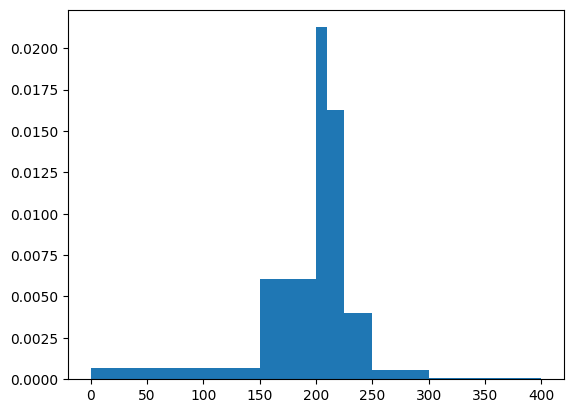

In [43]:
plt.hist(x, bins, density = True)
plt.show()

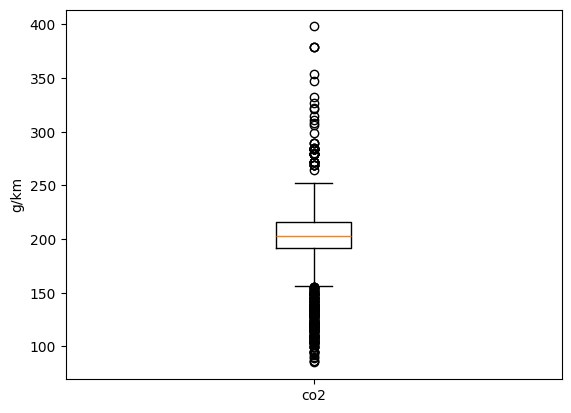

In [44]:
x = x[x > 0]
plt.boxplot(x)
plt.ylabel('g/km')
plt.xticks([1], ['co2'])
plt.show()


## masse_ordma_max Visualisation

In [45]:
x = np.array(df['masse_ordma_max'][:])
min(x), max(x)
bins = np.array([0.,1500,2000,2500,2750,3200])
bins, len (bins)
ni, bins = np.histogram(x, bins = bins)
lo = bins[:-1]
hi = bins[1:]
fi = ni/n
Fi = np.cumsum(fi)
ft_quant = pd.DataFrame(data = np.transpose([lo, hi, ni, fi, Fi]), columns = ['lo', 'hi', 'frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft_quant

,lo,hi,frequencies,relative frequencies,cummulative relative frequencies
0,0.0,1500.0,106.0,0.0530,0.0530
1,1500.0,2000.0,213.0,0.1065,0.1595
2,2000.0,2500.0,908.0,0.4540,0.6135
3,2500.0,2750.0,342.0,0.1710,0.7845
4,2750.0,3200.0,431.0,0.2155,1.0000


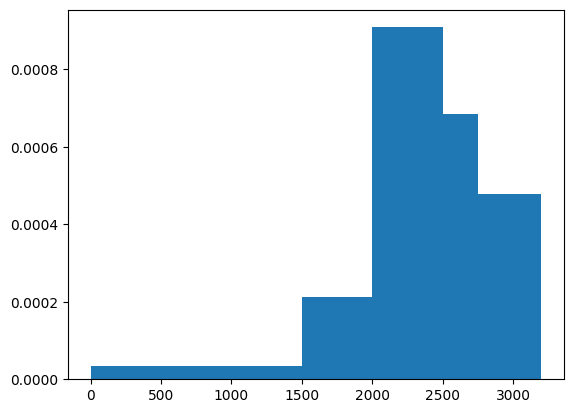

In [46]:
plt.hist(x, bins, density = True)
plt.show()

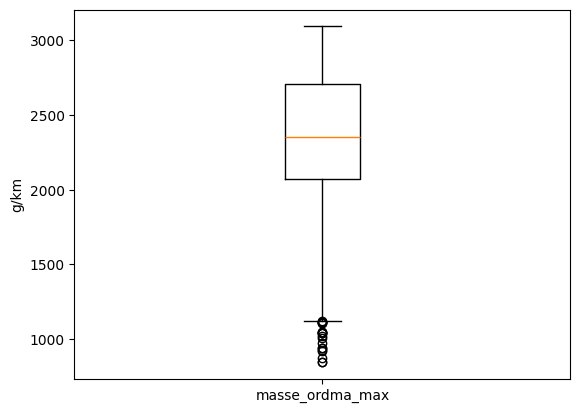

In [47]:

plt.boxplot(x)
plt.ylabel('g/km')
plt.xticks([1], ['masse_ordma_max'])
plt.show()


## hybride Visualisation

In [48]:
n=len(df)
x = np.array(df['hybride'][:]) 
levels, ni = np.unique(x, return_counts = True) 
levels, ni, sum(ni)

(array(['non', 'oui'], dtype=object), array([1978,   22]), np.int64(2000))

In [49]:
fi = ni/n
fi, sum(fi)

(array([0.989, 0.011]), np.float64(1.0))

In [50]:
ft_hybride = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft_hybride

,frequencies,relative frequencies
non,1978.0,0.989
oui,22.0,0.011


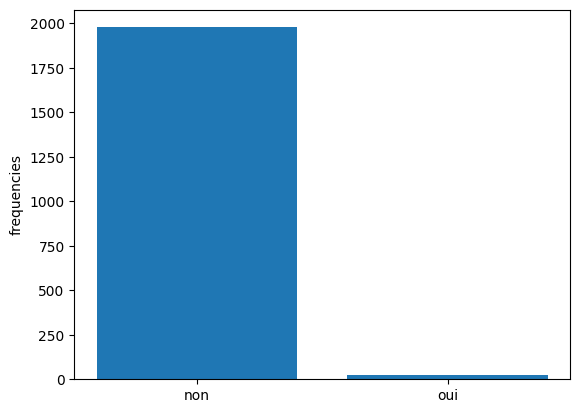

In [51]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

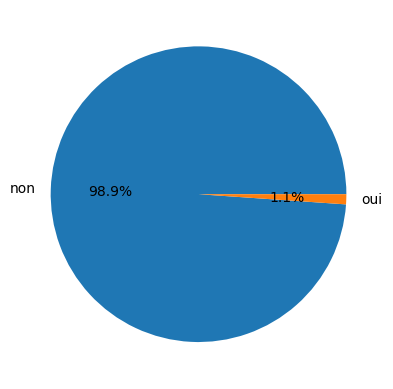

In [52]:
plt.pie(ni, labels = levels, autopct='%1.1f%%')
plt.show()

That means that the majority of the vehicles of the dataset are not hybrid.

## conso_mixte Visualisation

In [53]:
x0 = np.array(df['conso_mixte'][:])
min(x0), max(x0)
bins = np.linspace(0, 100, 21) 
bins, len (bins)

(array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 21)

In [54]:
bins = np.array([  0.,   5.,6,7,8,8.25,  10.,  15.])
ni0 = np.histogram(x0, bins = bins)[0]  
ni0

array([  7,  11,   7,   5, 170,  12,   2])

In [55]:
lo = bins[:-1]
hi = bins[1:]
fi0 = ni0/n
Fi0 = np.cumsum(fi0)
ft_conso_mixte = pd.DataFrame(data = np.transpose([lo, hi, ni0, fi0, Fi0]), columns = ['lo', 'hi', 'frequencies', 'relative frequencies', 'cummulative relative frequencies'])
ft_conso_mixte

,lo,hi,frequencies,relative frequencies,cummulative relative frequencies
0,0.00,5.00,7.0,0.0035,0.0035
1,5.00,6.00,11.0,0.0055,0.0090
2,6.00,7.00,7.0,0.0035,0.0125
3,7.00,8.00,5.0,0.0025,0.0150
4,8.00,8.25,170.0,0.0850,0.1000
5,8.25,10.00,12.0,0.0060,0.1060
6,10.00,15.00,2.0,0.0010,0.1070


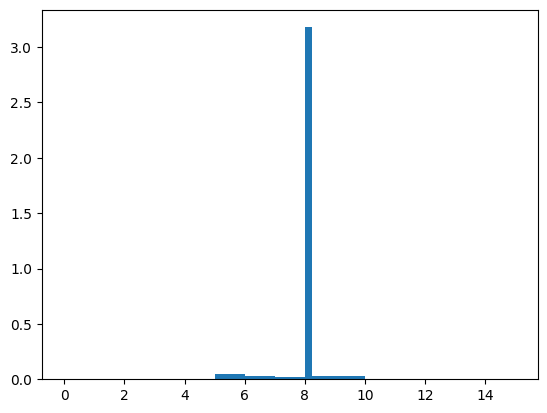

In [56]:
plt.hist(x0, bins, density = True)
plt.show()

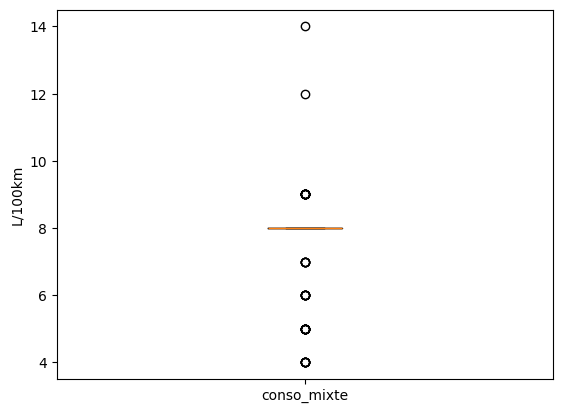

In [57]:
x0 = x0[x0 > 0]
plt.boxplot(x0)
plt.ylabel('L/100km')
plt.xticks([1], ['conso_mixte'])
plt.show()

## typ_boite_nb_rapp Visualisation

In [58]:
x1 = np.array(df['typ_boite_nb_rapp'][:]) 
levels, ni = np.unique(x1, return_counts = True) 
levels, ni, sum(ni)

(array(['A 5', 'A 6', 'A 7', 'A 8', 'A 9', 'D 5', 'D 6', 'M 5', 'M 6',
        'V 0'], dtype=object),
 array([ 490,   35,  269,   15,    1,    3,    2,   42, 1122,   21]),
 np.int64(2000))

In [59]:
fi = ni/n
fi, sum(fi)

(array([2.450e-01, 1.750e-02, 1.345e-01, 7.500e-03, 5.000e-04, 1.500e-03,
        1.000e-03, 2.100e-02, 5.610e-01, 1.050e-02]),
 np.float64(1.0))

In [60]:
ft_typ_boite_nb_rapp = pd.DataFrame(data = np.transpose([ni, fi]), index = levels, columns = ['frequencies', 'relative frequencies'])
ft_typ_boite_nb_rapp

,frequencies,relative frequencies
A 5,490.0,0.2450
A 6,35.0,0.0175
A 7,269.0,0.1345
A 8,15.0,0.0075
A 9,1.0,0.0005
D 5,3.0,0.0015
D 6,2.0,0.0010
M 5,42.0,0.0210
M 6,1122.0,0.5610
V 0,21.0,0.0105


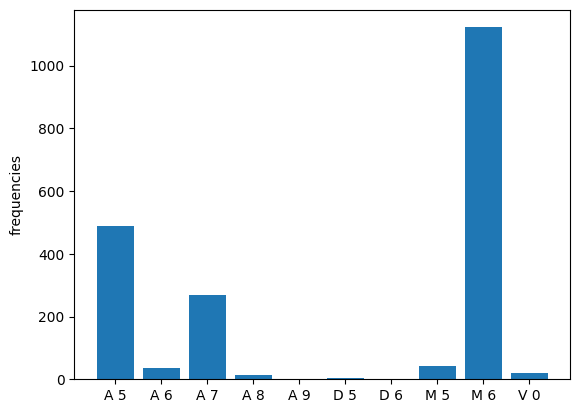

In [61]:
plt.bar(levels, ni)
plt.ylabel('frequencies')
plt.show()

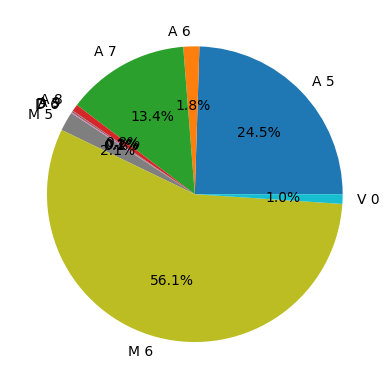

In [62]:
plt.pie(ni, labels = levels, autopct='%1.1f%%')
plt.show()

It seems like the majority of the vehicles of this dataset are of manual transmission with 6 gears.

#  III : Simple linear regression

In [63]:
x = df.co2
y = df.masse_ordma_max
n=len(df)
n

2000

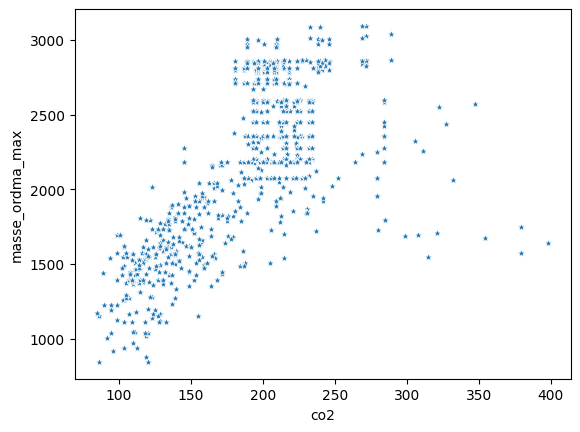

In [64]:
sns.scatterplot(data = df, x = 'co2', y = 'masse_ordma_max', marker = '*')
plt.show()

We assume a linear model. We have $n=2000$, with $x_{i}$ the value of the vehicle's maximum mass and $y_{i}$ its CO2 emission. So we consider the data to be a sample of size $n$:
$n$-sample $((X_1,Y_1),...,(X_n,Y_n))$
We suppose that:

$Y_i = a + b\, x_i$ + $\varepsilon_{i}$ with $i\in\{1,...,n\}$

where $\varepsilon_1$, ..., $\varepsilon_n$ are independent and distributed as $\mathcal{N}(0,\sigma^2)$, $a$, $b$ and $\sigma>0$ being unknown parameters.


### Estimation of parameters

In [65]:
lr = st.linregress(x,y)
lr

LinregressResult(slope=np.float64(nan), intercept=np.float64(nan), rvalue=np.float64(nan), pvalue=np.float64(nan), stderr=np.float64(nan), intercept_stderr=np.float64(nan))

In [66]:
jp.jupyprint(f'The estimations of the parameters $a$ and $b$ are $\\hat a =$ {lr.intercept:.3f} \
and $\\hat b =$ {lr.slope:.3f} respectively.')

The estimations of the parameters $a$ and $b$ are $\hat a =$ nan and $\hat b =$ nan respectively.

In [67]:
hy = lr.intercept + lr.slope * x
e = y - hy
sse = np.sum(e**2)
hs2 = sse/(n-2)
jp.jupyprint(f'The estimation of the parameter $\\sigma^2$ is $\\hat\\sigma^2$ = {hs2:.3f} .')



The estimation of the parameter $\sigma^2$ is $\hat\sigma^2$ = 0.000 .

We can see that the $Y$ parameter is widely spread out around the regression line because the prameter $\sigma^2$ is really big.
That's we can see with the following plot where most of the points are far from the regression line.

### Visualization of the regression

In [68]:
fit = [lr.slope, lr.intercept]
poly = np.poly1d(fit)

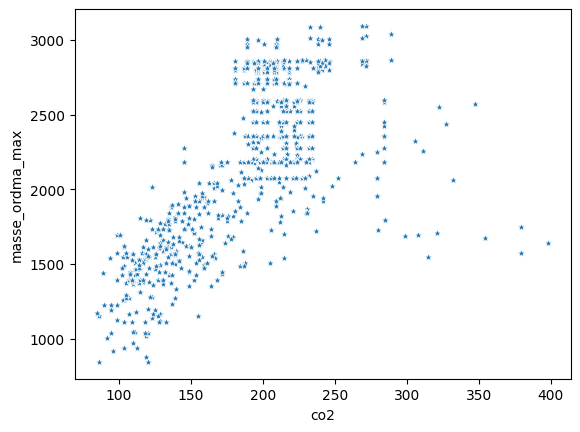

In [69]:
ran = max(x)-min(x)
lb = min(x)-ran/20
ub = max(x)+ran/20
z = [lb, ub]
sns.scatterplot(data = df, x = 'co2', y = 'masse_ordma_max', marker = '*')
plt.plot(z,poly(z),'r-', linewidth = 0.7)
plt.show()

In [70]:
jp.jupyprint('$R^2$ = {:2.3f}'.format(lr.rvalue**2)+ ' ,   $p$-value = {:1.2e}'.format(lr.pvalue))

$R^2$ = nan ,   $p$-value = nan

We can see with the results that the $R^2$ is  $0.25$ that means that the correlation between the two variable is not very strong (if it was strong it would be near $1$).

Finally the $p$-value is extremly low wich means that the realtion between the two vriables is still significant but not strong. 

we can consider as outliers the points which are at a distance from the line superior to twice the standard deviation of the residuals. We can visualize it on a graph.

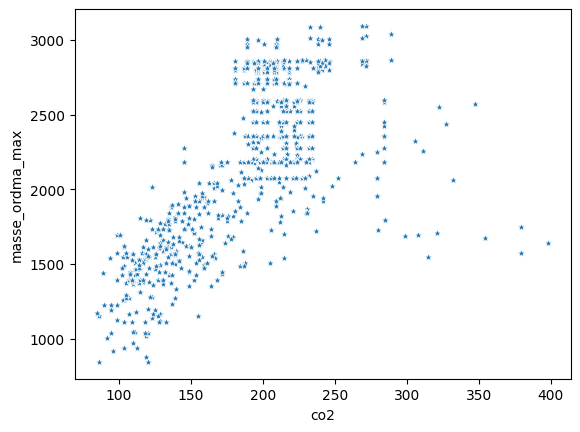

In [71]:
sns.scatterplot(data = df, x = 'co2', y = 'masse_ordma_max', marker = '*')
plt.plot(z,poly(z),'r-', linewidth = 0.7)
plt.plot(z,poly(z)+2.5*np.sqrt(hs2),'b--', linewidth = 0.5)
plt.plot(z,poly(z)-2.5*np.sqrt(hs2),'b--', linewidth = 0.5)
plt.show()